In [1]:
# Plotting notebook for the project
# Imports
import argparse
import os
import sys
import glob
import re

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from datetime import datetime
import scipy.stats as stats

# Local imports
sys.path.append('/home/users/benhutch/skill-maps')
import dictionaries as dic
import functions as fnc

In [2]:
# for the GIF plots
!pip install Pillow
from PIL import Image

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Set up the arguments to be used
# Defined globally in this notebook
variable = "psl"
region = "north-atlantic"
season = "DJFM"
forecast_range = "2-9"

In [4]:
# Load the model data
datasets = fnc.load_data(dic.base_dir, dic.models, variable, region, forecast_range, season)

Searching for files in  /home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/*.nc
Files for BCC-CSM2-MR: ['/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r6i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r5i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r7i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atlantic_2-9_DJFM-r2i1.nc', '/home/users/benhutch/skill-maps-processed-data/psl/BCC-CSM2-MR/north-atlantic/years_2-9/DJFM/outputs/mergetime/mergetime_BCC-CSM2-MR_psl_north-atla

In [5]:
# Process the model data
variable_data, model_time = fnc.process_data(datasets, variable)

Dataset type: <class 'dict'>
Variable data values:  [[[-8.00000000e+00 -5.53906250e+00 -2.63281250e+00 ...  1.88750000e+01
    1.70390625e+01  1.60937500e+01]
  [-7.06250000e+00 -3.65625000e+00  1.57812500e+00 ...  1.94218750e+01
    1.97968750e+01  2.04765625e+01]
  [-3.16406250e+00 -1.27343750e+00  3.67187500e+00 ...  2.24687500e+01
    2.37734375e+01  2.39765625e+01]
  ...
  [ 1.25507812e+02  1.19804688e+02  1.15234375e+02 ... -1.63945312e+02
   -1.74531250e+02 -1.85953125e+02]
  [ 1.04992188e+02  1.03031250e+02  1.01765625e+02 ... -1.72828125e+02
   -1.83304688e+02 -1.94156250e+02]
  [ 9.42812500e+01  9.49218750e+01  9.50078125e+01 ... -1.97093750e+02
   -2.07320312e+02 -2.17554688e+02]]

 [[ 2.43750000e+00 -4.84375000e-01 -3.45312500e+00 ... -4.75781250e+01
   -4.63984375e+01 -4.07343750e+01]
  [ 1.25468750e+01  9.78125000e+00  5.61718750e+00 ... -4.34687500e+01
   -4.33046875e+01 -4.10234375e+01]
  [ 2.37656250e+01  1.85468750e+01  1.50078125e+01 ... -4.33750000e+01
   -4.1882812

In [6]:
# Choose the obs path based on the variable
if variable == "psl":
    obs_path = dic.obs_psl
elif variable == "tas":
    obs_path = dic.obs_tas
elif variable == "sfcWind":
    obs_path = dic.obs_sfcWind
elif variable == "rsds":
    obs_path = dic.obs_rsds
else:
    print("Error: variable not found")
    sys.exit()

# choose the obs var name based on the variable
if variable == "psl":
    obs_var_name = dic.psl_label
elif variable == "tas":
    obs_var_name = dic.tas_label
elif variable == "sfcWind":
    obs_var_name = dic.sfc_wind_label
elif variable == "rsds":
    obs_var_name = dic.rsds_label
else:
    print("Error: variable not found")
    sys.exit()

In [7]:
# # Process the observations
obs = fnc.process_observations(variable, region, dic.north_atlantic_grid, 
                               forecast_range, season, obs_path, obs_var_name)

/opt/jaspy/lib/python3.10/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Region grid dimensions: {'lon1': 280, 'lon2': 37.5, 'lat1': 77.5, 'lat2': 20}
Forecast range: 2 - 9
Rolling mean range: 8
Processed observations dataset: Frozen({'time': 63, 'lon': 48, 'lat': 24})


In [8]:
# # check the values of obs
# obs["var151"].values

In [9]:
obs

<xarray.Dataset>
Dimensions:  (time: 63, lon: 48, lat: 24)
Coordinates:
  * time     (time) datetime64[ns] 1960-12-31 1961-12-31 ... 2022-12-31
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 77.5 75.0 72.5 70.0 67.5 ... 30.0 27.5 25.0 22.5 20.0
Data variables:
    var151   (time, lat, lon) float64 dask.array<chunksize=(8, 24, 16), meta=np.ndarray>

In [10]:
# # Attempt to plot the data
# fnc.plot_obs_data(obs)

In [11]:
# print(variable_data["CMCC-CM2-SR5"])

In [12]:
# fnc.plot_model_data(variable_data, dic.test_model, dic.gif_plots_dir)

In [13]:
print((variable_data['NorCPM1']))

[<xarray.DataArray 'psl' (time: 59, lat: 24, lon: 48)>
dask.array<open_dataset-c604e18a0c2a4a559868b6549c4f083cpsl, shape=(59, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1965-08-01 00:00:00 ... 2023-08-01 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean
    comment:        Sea Level Pressure
    original_name:  PSL
    cell_measures:  area: areacella
    history:        2019-09-19T19:08:59Z altered by CMOR: Converted type from..., <xarray.DataArray 'psl' (time: 59, lat: 24, lon: 48)>
dask.array<open_dataset-26d9c6a987179325ceb462e1378263d6psl, shape=(59, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:

In [14]:
print(type(obs))

<class 'xarray.core.dataset.Dataset'>


In [15]:
print(type(dic.test_model_norcpm))

<class 'list'>


In [16]:
# rfield, pfield, obs_lons_converted, lons_converted = fnc.calculate_spatial_correlations(obs, variable_data, dic.models)

In [17]:
# # Call the function to plot the spatial correlations of these
# fnc.plot_correlations(dic.test_model_norcpm, rfield, pfield, obs, variable, region, season, forecast_range, dic.plots_dir, obs_lons_converted, lons_converted, dic.azores_grid, dic.iceland_grid)

Processing model: BCC-CSM2-MR
Processing model type: <class 'str'>
Data to be processed: [<xarray.DataArray 'psl' (time: 54, lat: 24, lon: 48)>
dask.array<open_dataset-9fd0b4502d86d8e60330401c3415e667psl, shape=(54, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1966-08-01 00:00:00 ... 2019-08-01 00:00:00
  * lon      (lon) float64 -80.0 -77.5 -75.0 -72.5 -70.0 ... 30.0 32.5 35.0 37.5
  * lat      (lat) float64 20.0 22.5 25.0 27.5 30.0 ... 67.5 70.0 72.5 75.0 77.5
Attributes:
    standard_name:  air_pressure_at_mean_sea_level
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   area: time: mean (interval: 5 minutes)
    comment:        Sea Level Pressure
    original_name:  PSL
    cell_measures:  area: areacella, <xarray.DataArray 'psl' (time: 54, lat: 24, lon: 48)>
dask.array<open_dataset-c0729fc0659803e958abca1aaeb71f1bpsl, shape=(54, 24, 48), dtype=float32, chunksize=(50, 24, 48), chunkty

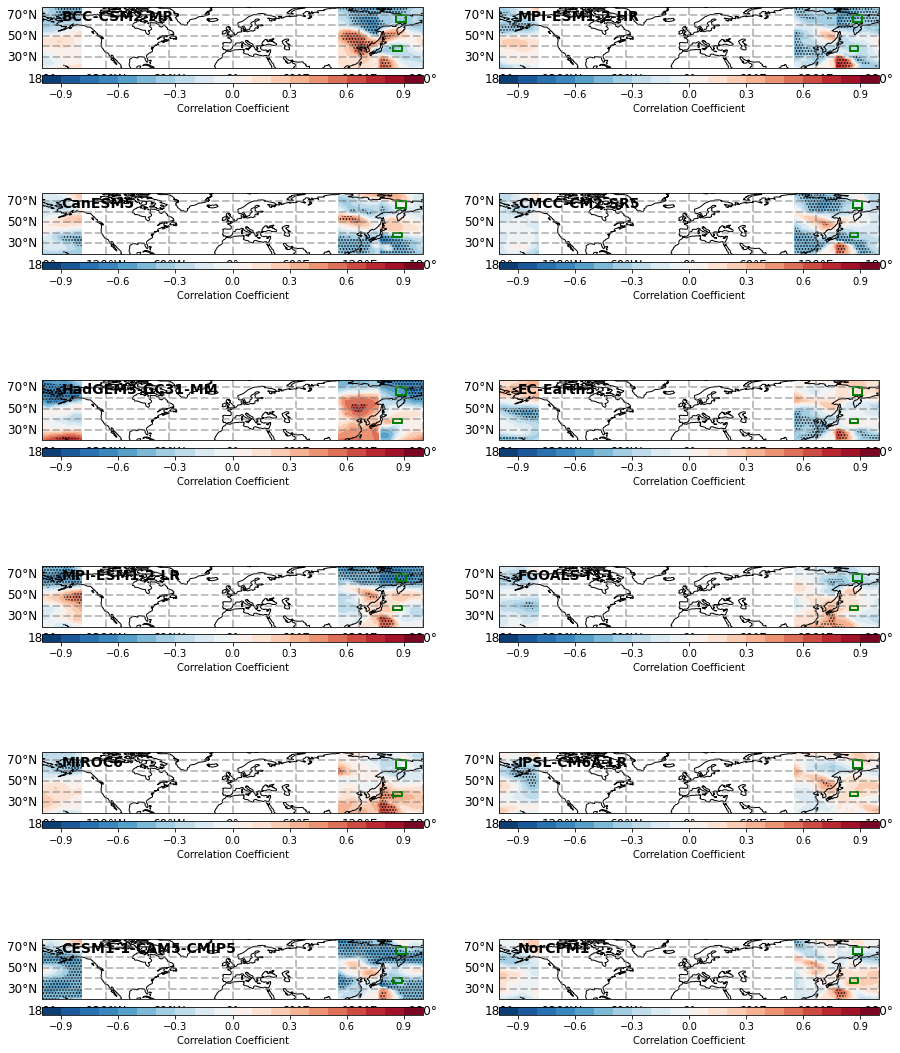

In [18]:
# Test the new function which plots the spatial correlations as subplots
# For all of the models
fnc.plot_correlations_subplots(dic.models, obs, variable_data, variable, region, season, forecast_range, dic.plots_dir, dic.azores_grid, dic.iceland_grid)